The purpose of this TASK is to segregate fake news from real news by using a suitable data science model such as Naïve Bayes.

We use both fake news and real news as training inputs to our TFIDF (Term Frequency and Inverse Document Frequency) features for creating a classifier. Then a regular test set is given as input and the classifier to detect if it is fake news or real news


 **In all times of human existence real news has to be separated from fake news or rumour mongering. The need for such classification has never been more acute than in the recent times. Data Science models can be favourably used to do this task.**

In [2]:
import numpy as np
import pandas as pd

df=pd.read_csv('fake_or_real_news.csv')

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


Simple Approach for the Problem:

1. Data Collection:

 (fakes news and real news datasets)
 explain rationale
2. Data Preprocessing:

 filter and manipulate columns, adding labels (fake or real), and merge on selected columns, data       visualization

3. Preprocessing the text: 
 NLP Approach

4. Text to features conversion:
  data cleaning
  removing stopwords
  removing punctuation
   
6. Model Implementation
  Naive Bayes
7. Check on Model Performance
  Classification Report 
  

In [47]:
df.shape

(6335, 5)

In [48]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
FAKE          0
dtype: int64

In [49]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label', 'FAKE'], dtype='object')

In [50]:
df.info

<bound method DataFrame.info of       Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  FAKE  
0     Daniel Greenfield, a Shillman Journalis

In [51]:
#adiing label to fake
df['FAKE']=df['label'].apply(lambda x:0 if x=="REAL" else 1)
df

,Unnamed: 0,title,text,label,FAKE
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,1
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,1
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,1
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,0
...,...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,0
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,1
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,1
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,0


In [52]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
FAKE          0
dtype: int64

<Axes: xlabel='label', ylabel='count'>

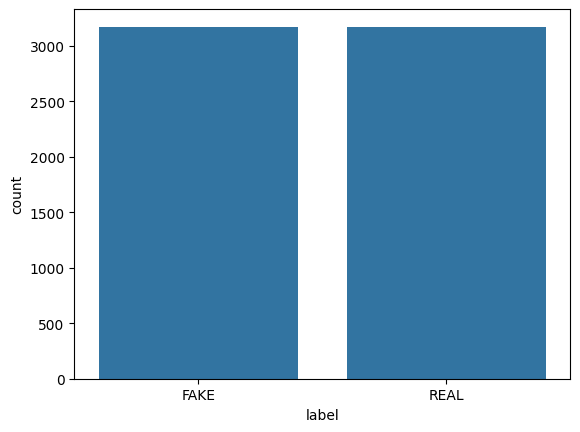

In [53]:
import seaborn as sns

sns.countplot(x=df['label'],data=df)


In [54]:
df['label'].value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import LinearSVC


In [56]:

#Naive model with hyper parameters
pipeline_nb = Pipeline([
    ('bow', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

pipeline_svc = Pipeline([
    ('bow', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('classifier', LinearSVC())
])



In [57]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=123)

In [58]:
print(pipeline_nb.fit(X_train, y_train))

Pipeline(steps=[('bow', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])


In [59]:
print(pipeline_svc.fit(X_train, y_train))

Pipeline(steps=[('bow', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()), ('classifier', LinearSVC())])


c:\Users\maddu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [60]:
y_pred = pipeline_svc.fit(X_train, y_train).predict(X_test)
y_pred

c:\Users\maddu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


array(['FAKE', 'FAKE', 'FAKE', ..., 'FAKE', 'REAL', 'FAKE'], dtype=object)

In [61]:
clf_report = classification_report(y_test, y_pred)
print('Classification_Report',clf_report)

Classification_Report               precision    recall  f1-score   support

        FAKE       0.92      0.96      0.94       644
        REAL       0.95      0.91      0.93       623

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



In [62]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Cnfusion Matrix',cnf_matrix)

Cnfusion Matrix [[617  27]
 [ 53 570]]


Text(95.72222222222221, 0.5, 'truth')

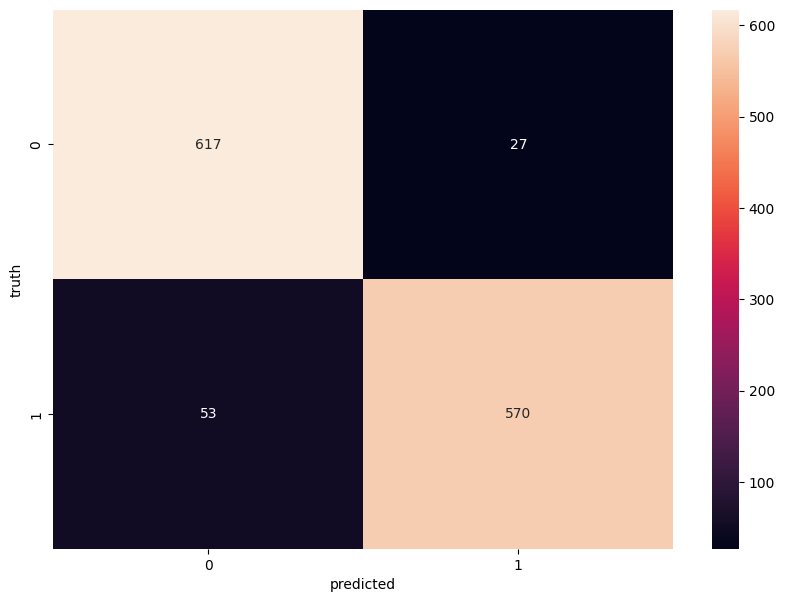

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sns.heatmap(cnf_matrix, annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9368587213891081
Precision: 0.9375539360859713
Recall: 0.9368587213891081
F1 Score: 0.9368105898907034
